### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
from sklearn.neighbors import KNeighborsClassifier

### Loading Data

In [2]:
golub = pd.read_csv("https://github.com/xuranw/469_public/blob/main/project/Golub.csv?raw=true")
golub.shape

(72, 3053)

#### Standarizing and Data spliting

In [4]:
scaler = StandardScaler()
std_golub = scaler.fit_transform(golub.iloc[:,2:])
X_train, X_test, y_train, y_test = train_test_split(std_golub, golub.iloc[:,1], test_size = 0.5, stratify = golub.iloc[:,1], random_state = 42)

### Counts of leukemia type

#### Entire Data

In [5]:
pd.DataFrame(golub['tumor_type'].value_counts())

,tumor_type
ALL,47
AML,25


#### Training Data

In [6]:
pd.DataFrame(y_train.value_counts())

,tumor_type
ALL,23
AML,13


#### Testing Data

In [7]:
pd.DataFrame(y_test.value_counts())

,tumor_type
ALL,24
AML,12


### Principla Component Analysis

In [8]:
pca = PCA()
pca.fit(X_train)

PCA()

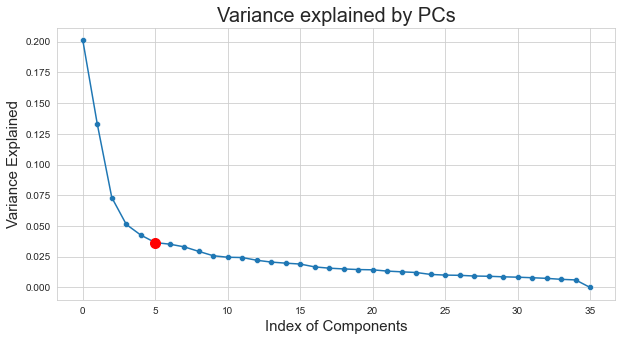

In [9]:

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.lineplot(x = range(len(pca.explained_variance_ratio_)), y = pca.explained_variance_ratio_)
sns.scatterplot(x = range(len(pca.explained_variance_ratio_)), y = pca.explained_variance_ratio_)
plt.plot(5, pca.explained_variance_ratio_[5], marker = "o", color = 'red', markersize = '10')
plt.ylabel('Variance Explained', fontsize = 15)
plt.xlabel('Index of Components', fontsize = 15)
plt.title('Variance explained by PCs', fontsize = 20)
plt.show()


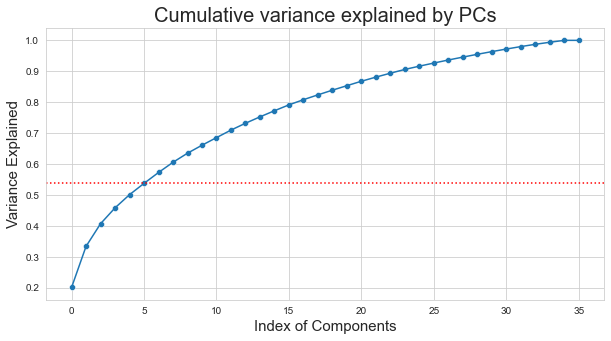

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.lineplot(x = range(len(pca.explained_variance_ratio_)), y = pca.explained_variance_ratio_.cumsum())
sns.scatterplot(x = range(len(pca.explained_variance_ratio_)), y = pca.explained_variance_ratio_.cumsum())
plt.axhline(pca.explained_variance_ratio_.cumsum()[5], color = 'red', linestyle = ':')
plt.ylabel('Variance Explained', fontsize = 15)
plt.xlabel('Index of Components', fontsize = 15)
plt.title('Cumulative variance explained by PCs', fontsize = 20)
plt.show()

In [11]:
pca = PCA(n_components=3)
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

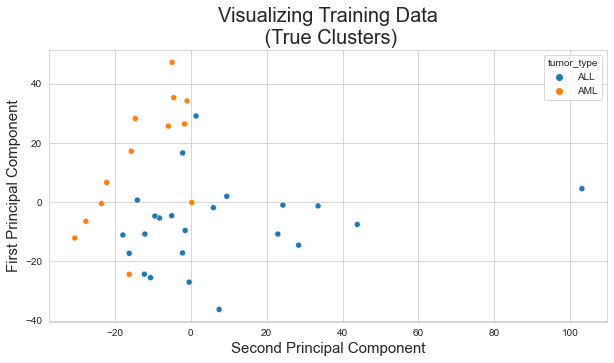

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = pca_train[:,0], y = pca_train[:,1], hue = y_train)
plt.ylabel('First Principal Component', fontsize = 15)
plt.xlabel('Second Principal Component', fontsize = 15)
plt.title('Visualizing Training Data\n (True Clusters)', fontsize = 20)
plt.show()

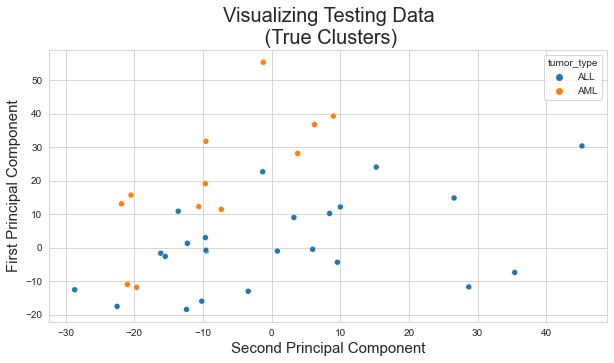

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = pca_test[:,0], y = pca_test[:,1], hue = y_test)
plt.ylabel('First Principal Component', fontsize = 15)
plt.xlabel('Second Principal Component', fontsize = 15)
plt.title('Visualizing Testing Data\n (True Clusters)', fontsize = 20)
plt.show()

### Linear Support Vector Machine

In [14]:
svm = SVC(kernel = 'linear')
svm.fit(pca_train, y_train)

SVC(kernel='linear')

In [16]:
svm_y_pred_train = svm.predict(pca_train)

#### Training Data

In [17]:
print(classification_report(svm_y_pred_train, y_train))

              precision    recall  f1-score   support

         ALL       0.96      0.96      0.96        23
         AML       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



In [18]:
print(confusion_matrix(svm_y_pred_train, y_train))

[[22  1]
 [ 1 12]]


#### Testing Data

In [19]:
svm_y_pred = svm.predict(pca_test)

In [20]:
print(confusion_matrix(svm_y_pred, y_test))

[[23  1]
 [ 1 11]]


In [21]:
print(classification_report(svm_y_pred, y_test))

              precision    recall  f1-score   support

         ALL       0.96      0.96      0.96        24
         AML       0.92      0.92      0.92        12

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



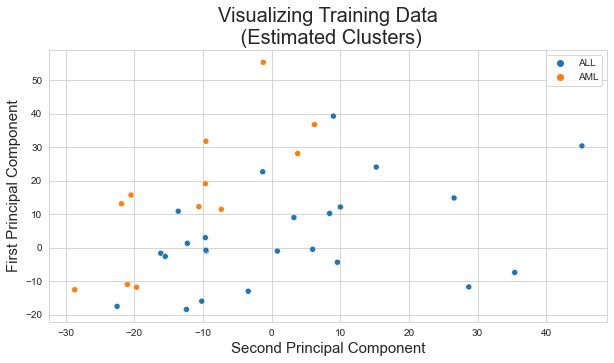

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = pca_test[:,0], y = pca_test[:,1], hue = svm_y_pred)
#sns.scatterplot(x = pca_test[:,0], y = pca_test[:,1], hue = y_test, alpha = 0.5)
plt.ylabel('First Principal Component', fontsize = 15)
plt.xlabel('Second Principal Component', fontsize = 15)
plt.title('Visualizing Training Data\n (Estimated Clusters)', fontsize = 20)
plt.show()

### K-Nearest Neighbor

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)

In [25]:
knn.fit(pca_train, y_train)
knn_y_pred_train = knn.predict(pca_train)
knn_y_pred = knn.predict(pca_test)

#### Training Data

In [26]:
print(classification_report(knn_y_pred_train, y_train))

              precision    recall  f1-score   support

         ALL       1.00      0.92      0.96        25
         AML       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.92      0.96      0.94        36
weighted avg       0.95      0.94      0.95        36



In [30]:
print(confusion_matrix(knn_y_pred_train, y_train))

[[23  2]
 [ 0 11]]


#### Testing Data

In [28]:
print(classification_report(knn_y_pred, y_test))

              precision    recall  f1-score   support

         ALL       0.92      0.92      0.92        24
         AML       0.83      0.83      0.83        12

    accuracy                           0.89        36
   macro avg       0.88      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36



In [31]:
print(confusion_matrix(knn_y_pred, y_test))

[[22  2]
 [ 2 10]]
